# SPGR

In [1]:
from multiprocessing import set_start_method
set_start_method('forkserver')

In [2]:
import version_control

Last run on cashlab03-deb at 2015-04-29 12:23:50.465973

Phypno Version: 5fd34bdecf40bf72accfd82aba7495eba94acafb

Babel==1.3, Cython==0.22, Jinja2==2.7.3, Markdown==2.6.2, MarkupSafe==0.23, Pillow==2.8.1, PyOpenGL==3.1.0, Pygments==2.0.2, Sphinx==1.3.1, alabaster==0.7.3, bash-kernel==0.3, beautifulsoup4==4.3.2, biopython==1.65, certifi==2015.04.28, coverage==3.7.1, decorator==3.4.2, docutils==0.12, easydev==0.8.3, ipython==3.1.0, jedi==0.9.0, jsonschema==2.4.0, matplotlib==1.4.3, memory-profiler==0.32, mistune==0.5.1, networkx==1.9.1, nibabel==2.0.0, nitime==0.5, nltk==3.0.2, nose==1.3.6, numpy==1.9.2, numpydoc==0.5, ordereddict==1.1, pandas==0.16.0, pandocfilters==1.2.4, pep8==1.6.2, pexpect==3.3, pockets==0.2.4, psutil==2.2.1, pycurl==7.19.5.1, pyflakes==0.8.1, pyparsing==2.0.3, pyqtgraph==0.9.10, python-dateutil==2.4.2, python-igraph==0.7.1-4, pytz==2015.2, pyzmq==14.6.0, requests==2.6.2, rope-py3k==0.9.4-1, rpy2==2.5.6, scikit-learn==0.16.1, scipy==0.15.1, six==1.9.0, snowballstem

In [3]:
from spgr import lg

## Spindle Properties: Descriptive

In [4]:
from spgr.constants import IMAGES_PATH

In [5]:
images_dir = IMAGES_PATH.joinpath('property_descriptive')
if not images_dir.exists():
    images_dir.mkdir()

In [6]:
from spgr.constants import (HEMI_SUBJ,
                            CHAN_TYPE,
                            DATA_OPTIONS,
                            SPINDLE_OPTIONS,
                            )
from spgr.read_data import get_data
from spgr.detect_spindles import get_spindles
from spgr.spindle_source import get_morph_linear
from spgr.plot_spindles import plot_surf

In [7]:
from IPython.display import display

In [38]:
def get_spindle_param(subj, param, ref):
    """Param: 'density', 'duration', 'peak_freq', 'peak_val'"""
    spindles = get_spindles(subj, chan_type=CHAN_TYPE, reref=ref, **SPINDLE_OPTIONS)
    
    if param == 'density':
        data = get_data(subj, 'sleep', chan_type=CHAN_TYPE, reref=ref, **DATA_OPTIONS)
        chan = data.attr['chan']

        dat_count = spindles.to_data('count')
        n_min = (data.number_of('trial') * (data.axis['time'][0][-1] - data.axis['time'][0][0])) / 60
        values = dat_count.data[0] / n_min
    
    elif param == 'duration':
        for one_spindle in spindles.spindle:
            one_spindle['duration'] = one_spindle['end_time'] - one_spindle['start_time']
        data = spindles.to_data('duration')
        values = data.data[0]
    else:
        data = spindles.to_data(param)
        values = data.data[0]

    return values

In [39]:
def plot_average_values(REF):
    for param in ('density', 'duration', 'peak_val', 'peak_freq'):

        if param == 'density':
            threshold = 0.01, None
            limits = 0, 2
        elif param == 'duration':
            threshold = 0.5, 2
            limits = 1, 1.5
        elif param == 'peak_val':
            threshold = 0.001, None 
            limits = 0, 70
        elif param == 'peak_freq':
            threshold = SPINDLE_OPTIONS['frequency']
            limits = 11, 13

        morphed = []

        for subj in HEMI_SUBJ:
            values = get_spindle_param(subj, param, REF)    
            morphed.append(get_morph_linear(subj, values, REF))

        v = plot_surf(morphed, threshold=threshold, limits=limits)
        v.save(str(images_dir.joinpath('{}_{}.png'.format(param, REF))))
        display(v)

### Reference to Average

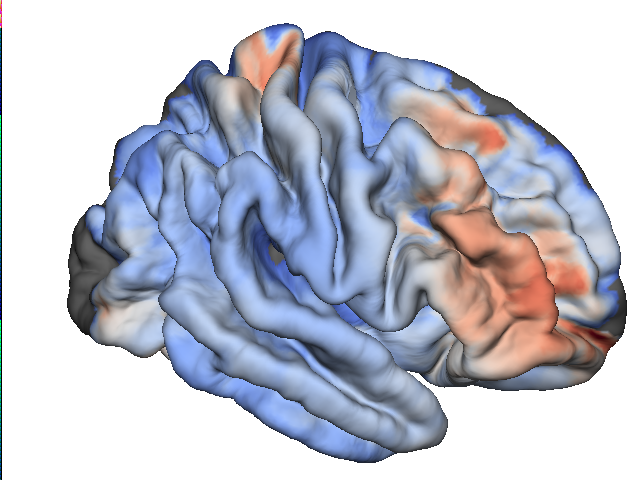

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:65: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


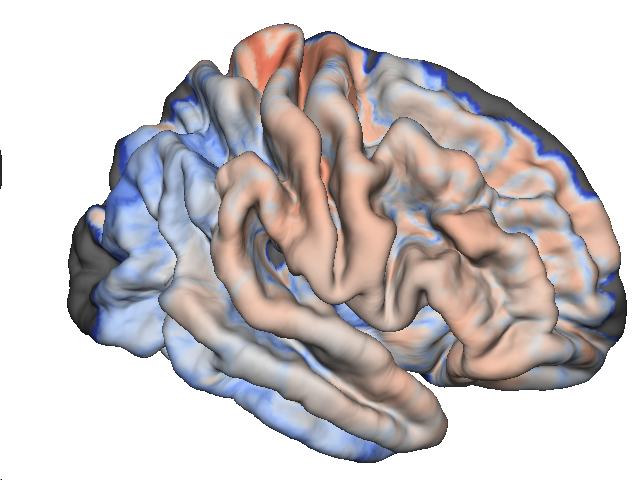

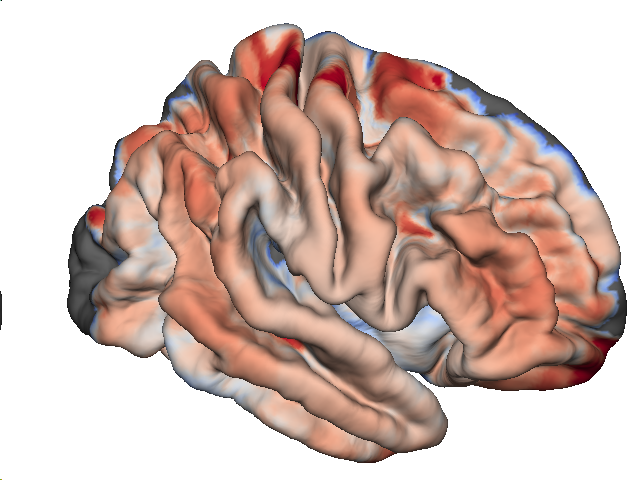

/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:65: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


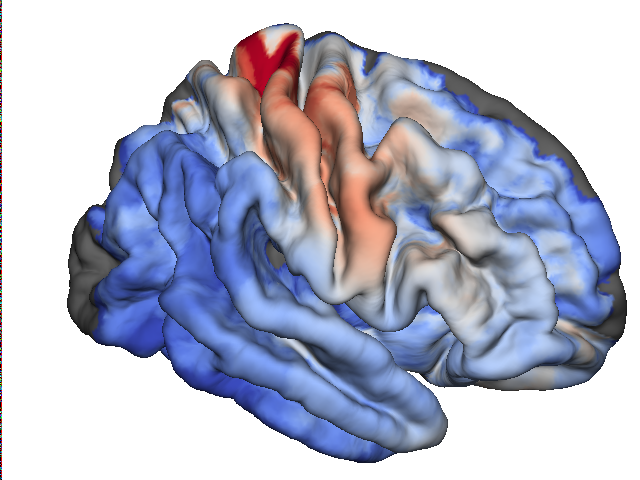

In [11]:
plot_average_values('avg')

### Bipolar Reference

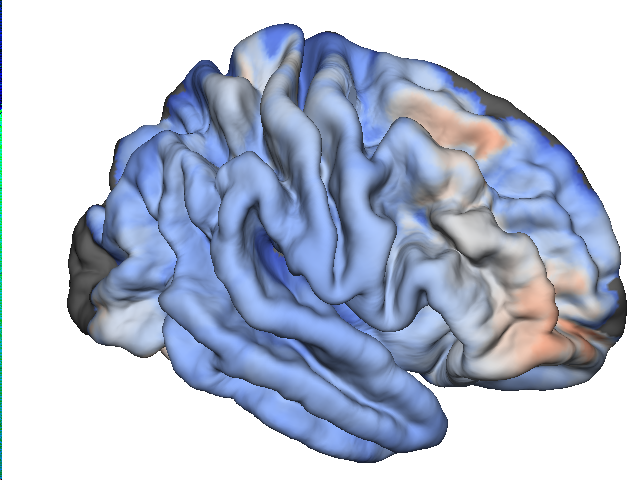

/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:63: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:65: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


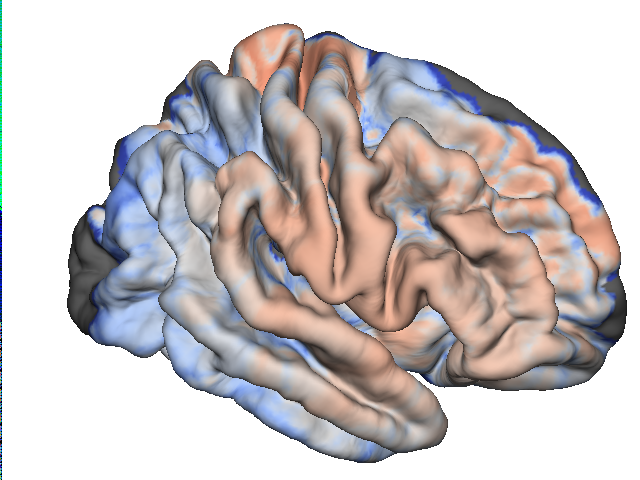

/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:63: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN


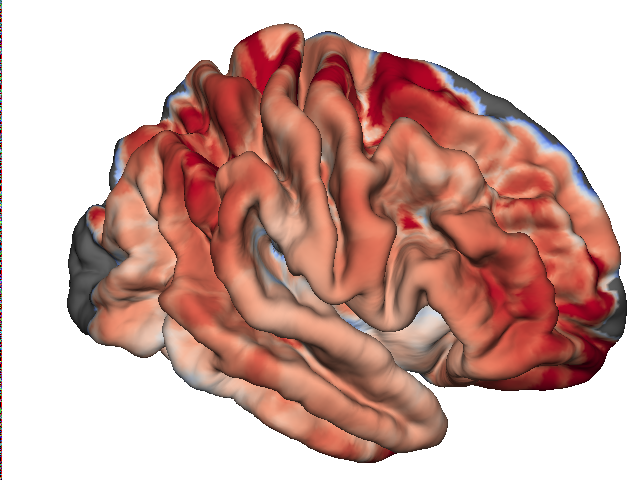

/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/gio/tools/venv/lib/python3.4/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:63: RuntimeWarning: invalid value encountered in less
  x.data[0][x.data[0] < threshold[0]] = NaN
/home/gio/projects/spgr/scripts/spgr/plot_spindles.py:65: RuntimeWarning: invalid value encountered in greater
  x.data[0][x.data[0] > threshold[1]] = NaN


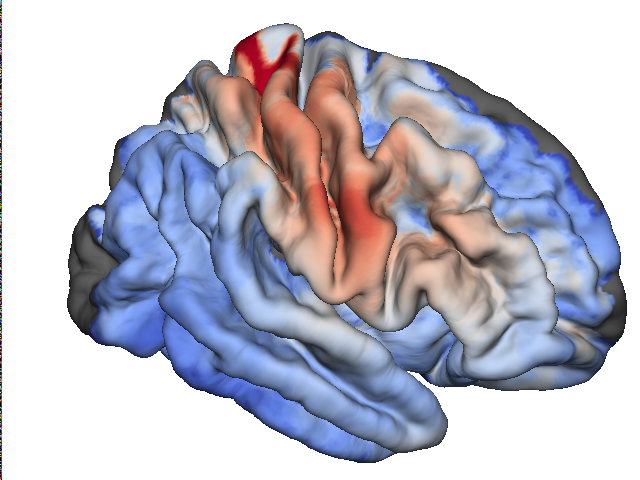

In [10]:
plot_average_values(15)

## Statistics

In [49]:
from phypno.attr import Freesurfer

from spgr.constants import REC_PATH, FS_FOLDER, HEMI_SUBJ
from spgr.read_data import get_chan_used_in_analysis
from spgr.spindle_source import get_chan_with_regions
from spgr.lmer_stats import lmer

In [ ]:
df_raw = {'subj': [],
          'region': [],
          'elec': [],
          'value': [],
         }

param = 'duration'
REF = 'avg'

for subj in HEMI_SUBJ:
    values = get_spindle_param(subj, param, REF)
    chan = get_chan_with_regions(subj, REF)
    
    for one_chan, one_value in zip(chan.chan, values):
        region = one_chan.attr['region']
        if region[:3] == 'ctx':
            df_raw['subj'].append(subj)
            df_raw['region'].append(region[7:])
            df_raw['elec'].append(one_chan.label)
            df_raw['value'].append(one_value)

INFO:spgr.read_data:MG33 analysis chan 64, with location 64
/home/gio/tools/phypno/phypno/attr/anat.py:84: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  pos[2] + neighb[p, 2]]
INFO:spgr.read_data:EM09 analysis chan 69, with location 69
INFO:spgr.read_data:MG61 analysis chan 93, with location 93


In [74]:
from spgr.constants import lg
lg.setLevel(20)

In [91]:
coef, pvalues = lmer(df_raw)

INFO:spgr:LMER summary
INFO:spgr:bankssts                       coef=10.439  p=0.0002
INFO:spgr:fusiform                       coef=10.892  p=0.0360
INFO:spgr:inferiortemporal               coef=11.041  p=0.0000
INFO:spgr:inferiorparietal               coef=11.227  p=0.0013
INFO:spgr:middletemporal                 coef=11.450  p=0.0075
INFO:spgr:superiortemporal               coef=11.484  p=0.0360
INFO:spgr:                               coef=11.712
INFO:spgr:rostralmiddlefrontal           coef=12.026  p=0.0075
INFO:spgr:parstriangularis               coef=12.115  p=0.0119
INFO:spgr:precentral                     coef=12.313  p=0.0000
INFO:spgr:postcentral                    coef=12.477  p=0.0000
INFO:spgr:superiorparietal               coef=13.087  p=0.0000


In [92]:
from spgr.plot_spindles import plot_lmer

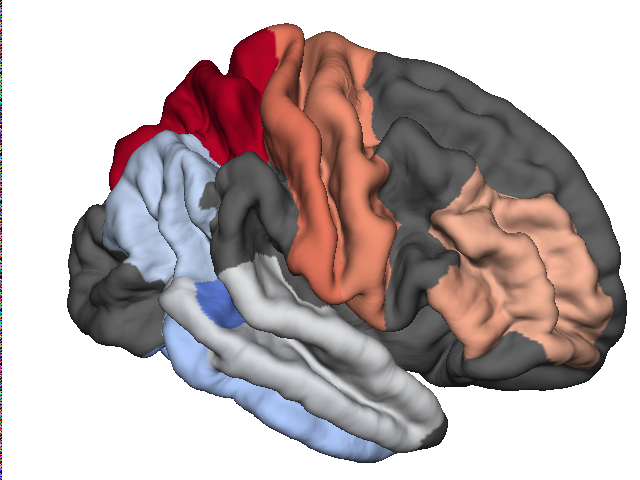

In [97]:
plot_lmer(coef, limits=(10, 13), pvalues=pvalues)